# Veri ön işleme

* Veri ön işleme genel bakış
* Aykırı gözlem analizi
* Eksik veri analizi
* Standartlaştırma
* Değişken dönüşümleri

###  Veri Temizleme

* Gürültülü veri
* Eksik veri
* Aykırı veri

### Veri standardizasyonu

* 0-1 Dönüşümü
* z-skoru dönüşümü
* Logaritmik dönüşüm

### Veri indirgeme

* Gözlem sayısının azaltılması
* Değişken sayısının azaltılması

### Değişken dönüşümü

* Sürekli deişkenlerde dönüşüm
* Categorik değişkenlerde dönüşüm

In [1]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df.shape

(53940, 10)

In [6]:
df.isnull().sum()

carat    0
depth    0
table    0
price    0
x        0
y        0
z        0
dtype: int64

In [11]:
df.dtypes

carat    float64
depth    float64
table    float64
price      int64
x        float64
y        float64
z        float64
dtype: object

In [5]:
df = df.select_dtypes(["float64","int64"])
df.dropna(inplace = True)
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [13]:
df_table = df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

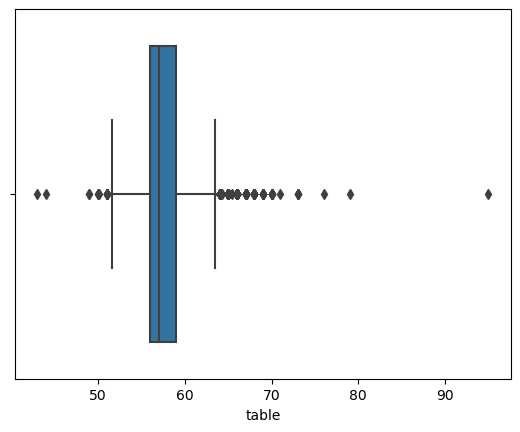

In [15]:
sns.boxplot(x = df.table);

Yukarıdaki grafikte aykırı değerler görülmektedir. Nokta olan değerler aykırı değerlerdir. IQR ile aykırı değerler dışında gözlem yapmaya çalışıcaz

In [16]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1

In [17]:
Q1

56.0

In [18]:
Q3

59.0

In [19]:
IQR

3.0

IRQ,Q3,Q1 değerleri kullanılarak eşik değerleri hesaplama işlemleri gerçekleştirilecek

In [22]:
alt_sinir = Q1 - 1.5*IQR ## karşılık geldiği yer grafiğin sol tarafındaki çizgi
ust_sinir = Q3 + 1.5*IQR ## karşılık geldiği yer grafiğin sağ tarafındaki çizgi

In [23]:
alt_sinir

51.5

In [24]:
ust_sinir

63.5

Sırada aykırı değerlerin incelenmesi bulunuyor. Aykırı değer sorgulamasıyla başlıyoruz

In [28]:
(df_table < alt_sinir) | (df_table > ust_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [32]:
aykiri_tf = (df_table < alt_sinir)
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [33]:
df_table[aykiri_tf].index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

### Aykırı gözlemler dilenildiği taktirde silinebilir

In [34]:
import pandas as pd
type(df_table)

pandas.core.series.Series

In [35]:
## Pandas series olarak gözüküyor DataFrame çevir
df_table = pd.DataFrame(df_table)
type(df_table)

pandas.core.frame.DataFrame

In [37]:
df_table.shape

(53940, 1)

In [62]:
t_df = df_table[((df_table > alt_sinir) & (df_table <ust_sinir)).any(axis = 1)]

In [63]:
len(t_df)

53334

### Aykırı gözlemler silinebilir

In [64]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [65]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [67]:
df.shape

(53940, 10)

In [70]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [73]:
df.select_dtypes(["float64","int64"])

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [76]:
df_table = df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

### Aykırı değerleri ortalama yöntemi

<Axes: xlabel='table'>

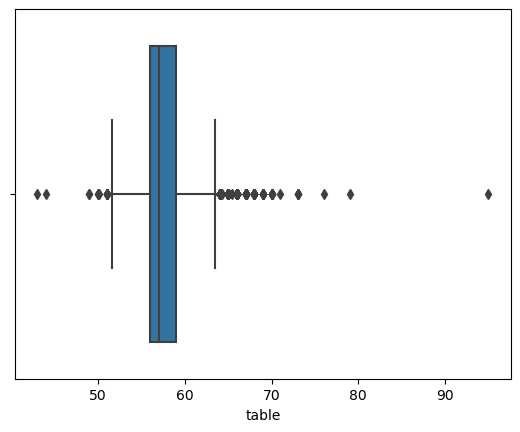

In [78]:
sns.boxplot(x = df_table)

In [81]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IRQ = Q3-Q1

In [82]:
Q1

56.0

In [83]:
Q3

59.0

In [84]:
IRQ

3.0

In [85]:
alt_sinir = Q1 - 1.5*IRQ
ust_sinir = Q3 + 1.5*IRQ
alt_sinir

51.5

In [88]:
ust_sinir

63.5

In [90]:
type(df_table)

pandas.core.series.Series

In [98]:
df_table = pd.DataFrame(df_table)

In [103]:
df_aykiri = ((df_table < alt_sinir) | (df_table > ust_sinir)).any(axis = 1)
len(df_aykiri)

53940

In [107]:
df_table[df_aykiri] = df_table.mean()
df_table[df_aykiri]

,table,64.84297520661157
2,57.373414,57.457184
91,57.373414,57.457184
145,57.373414,57.457184
219,57.373414,57.457184
227,57.373414,57.457184
...,...,...
53695,57.373414,57.457184
53697,57.373414,57.457184
53756,57.373414,57.457184
53757,57.373414,57.457184


### Baskılama yöntemi

Baskılama yönteminde alt sınırın altındaki aykırı değerler boxplot grafiğinin sol tarafındaki çizgiye, üst sınırdan büyük aykırı değerler boxplot grafiğinin sağ tarafındaki çizgiye baskılanır eşitlenir.

In [125]:
!pip install missingno

In [138]:
import numpy as np
import missingno as msno
import pandas as pd

In [146]:
v1 = np.array([1,2,3,np.NaN,7,1,np.NaN,9,15])
v2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
v3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame({"V1" : v1,"V2" : v2,"V3" : v3})
df

,V1,V2,V3
0,1.0,7.0,NaN
1,2.0,NaN,12.0
2,3.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


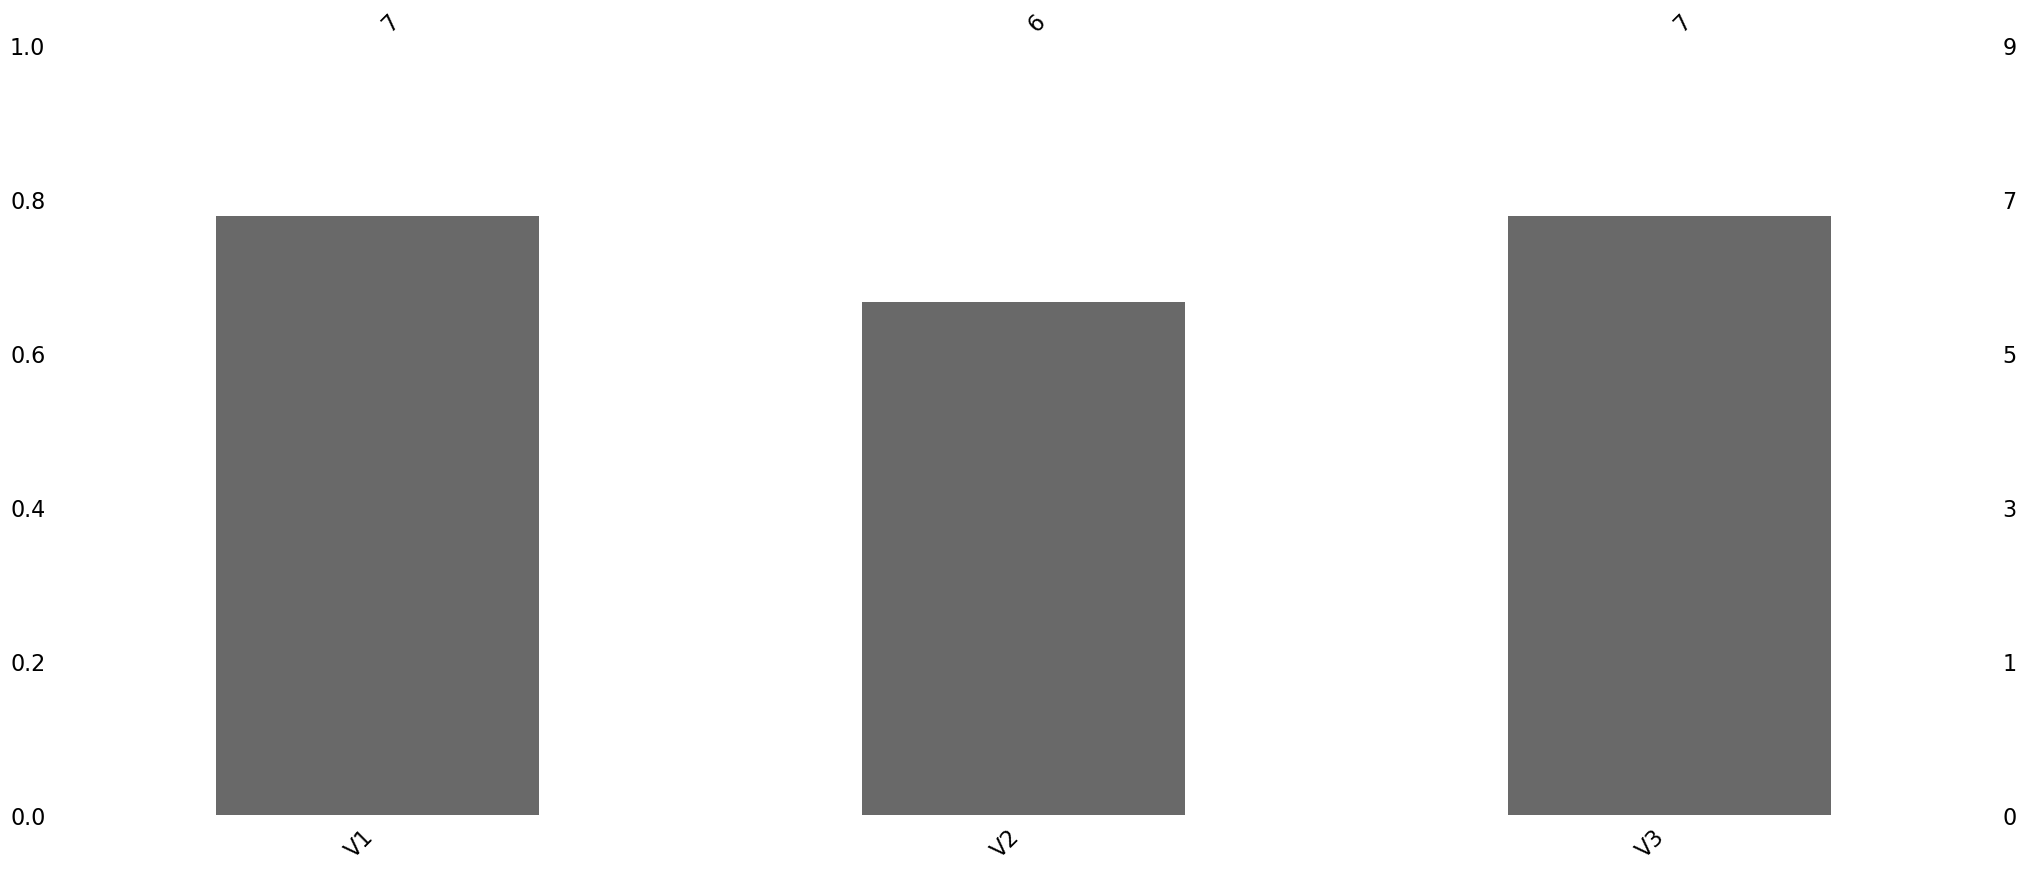

In [147]:
msno.bar(df);

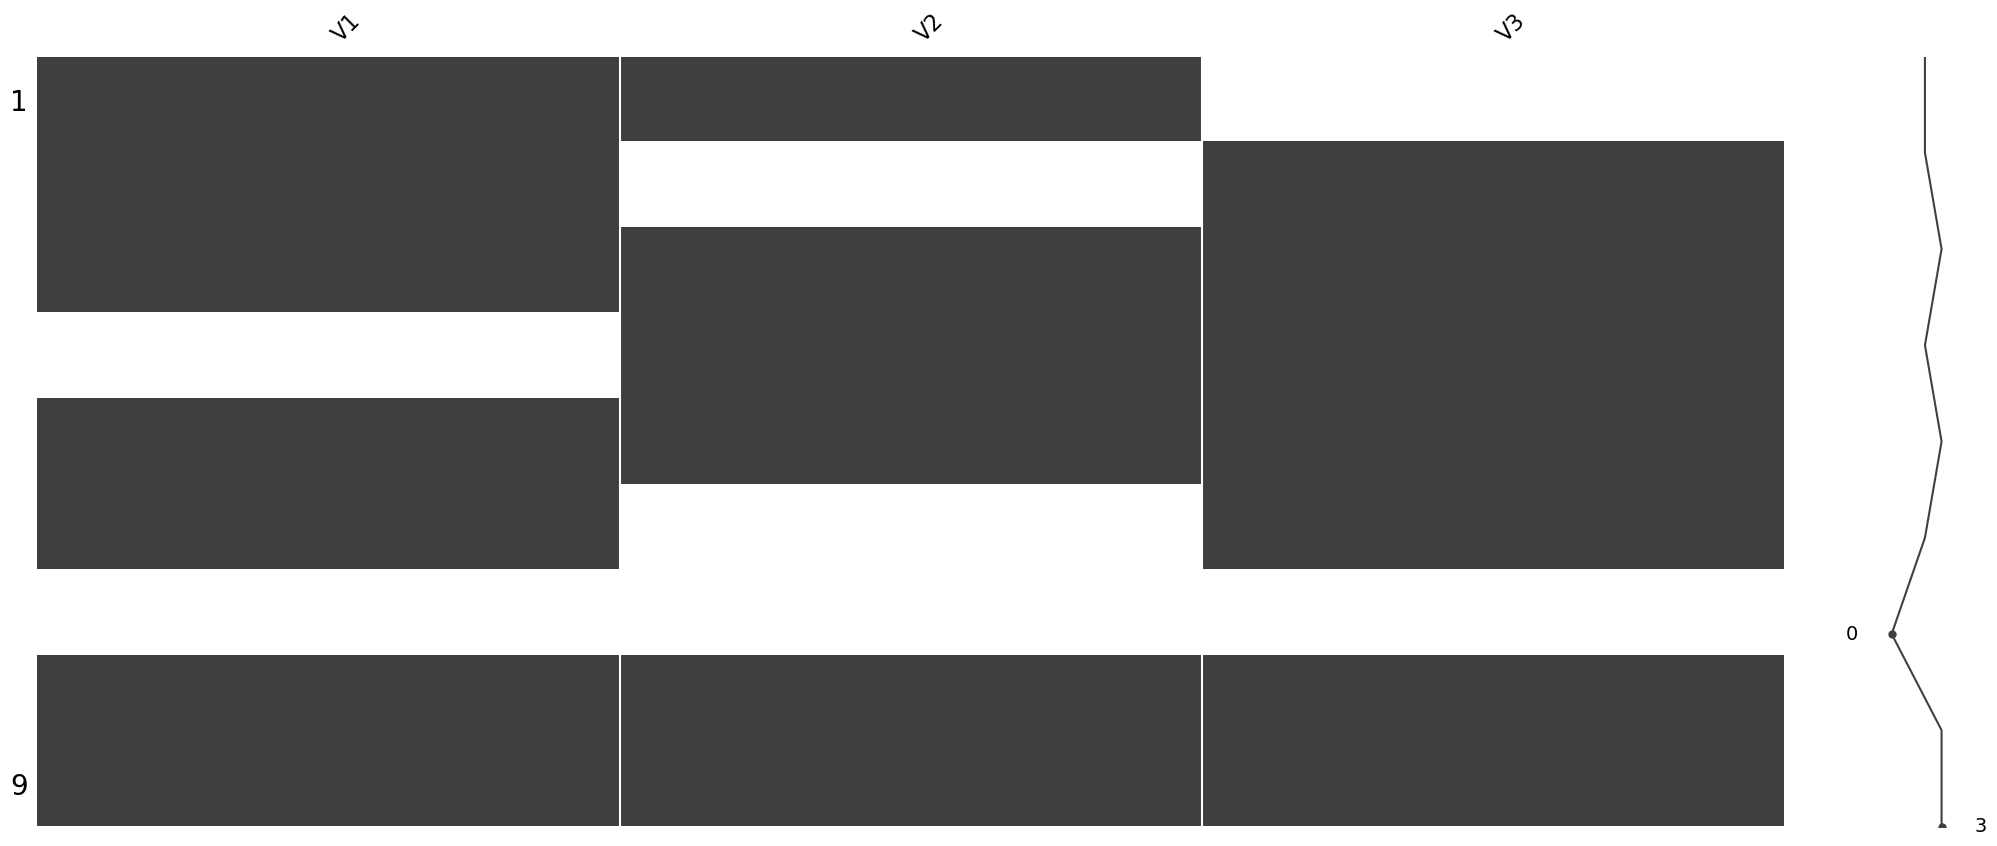

In [149]:
msno.matrix(df);